# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [60]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [61]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [62]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [63]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [64]:
df_fatalities.shape

(2535, 14)

In [65]:
df_hh_income.shape

(29322, 3)

In [66]:
df_pct_completed_hs.shape

(29329, 3)

In [67]:
df_pct_poverty.shape

(29329, 3)

In [68]:
df_share_race_city.shape

(29268, 7)

In [69]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [70]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [71]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [72]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [73]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [74]:
nan_counts_fatalities = df_fatalities.isna().sum()
nan_counts_hh_income = df_hh_income.isna().sum()
nan_counts_pct_completed_hs = df_pct_completed_hs.isna().sum()
nan_counts_pct_poverty = df_pct_poverty.isna().sum()
nan_counts_share_race_city = df_share_race_city.isna().sum()

print("NaN counts in df_fatalities:")
print(nan_counts_fatalities)
print()

print("NaN counts in df_hh_income:")
print(nan_counts_hh_income)
print()

print("NaN counts in df_pct_completed_hs:")
print(nan_counts_pct_completed_hs)
print()

print("NaN counts in df_pct_poverty:")
print(nan_counts_pct_poverty)
print()

print("NaN counts in df_share_race_city:")
print(nan_counts_share_race_city)
print()

duplicate_counts_fatalities = df_fatalities.duplicated().sum()
duplicate_counts_hh_income = df_hh_income.duplicated().sum()
duplicate_counts_pct_completed_hs = df_pct_completed_hs.duplicated().sum()
duplicate_counts_pct_poverty = df_pct_poverty.duplicated().sum()
duplicate_counts_share_race_city = df_share_race_city.duplicated().sum()

print("Duplicate counts in df_fatalities:")
print(duplicate_counts_fatalities)
print()

print("Duplicate counts in df_hh_income:")
print(duplicate_counts_hh_income)
print()

print("Duplicate counts in df_pct_completed_hs:")
print(duplicate_counts_pct_completed_hs)
print()

print("Duplicate counts in df_pct_poverty:")
print(duplicate_counts_pct_poverty)
print()

print("Duplicate counts in df_share_race_city:")
print(duplicate_counts_share_race_city)
print()


NaN counts in df_fatalities:
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

NaN counts in df_hh_income:
Geographic Area     0
City                0
Median Income      51
dtype: int64

NaN counts in df_pct_completed_hs:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

NaN counts in df_pct_poverty:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64

NaN counts in df_share_race_city:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [75]:
df_fatalities.fillna(0, inplace=True)
df_hh_income.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [76]:
df_pct_poverty.info()
df_pct_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [77]:
sorted_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

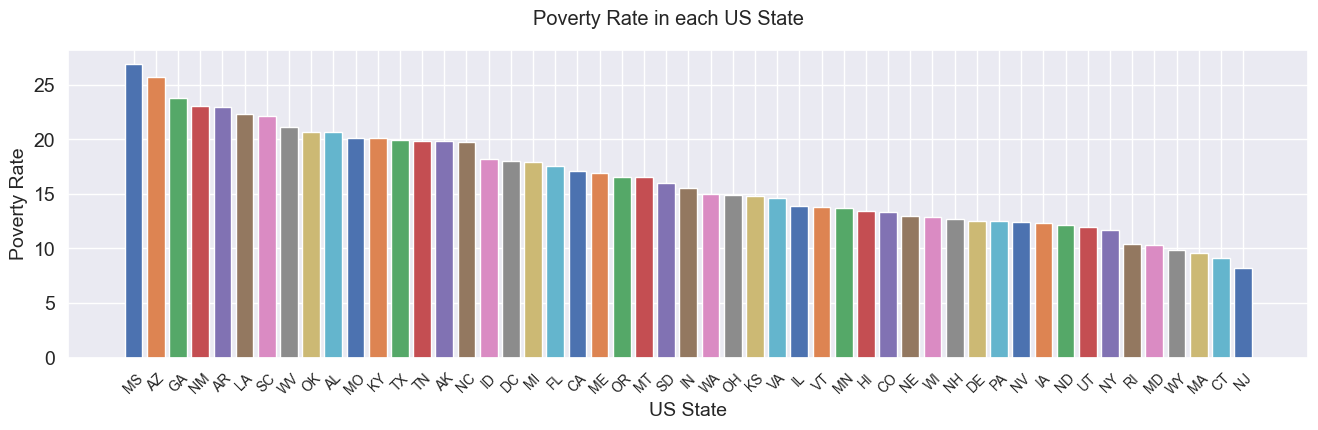

In [80]:
plt.figure(figsize=(16,4))
plt.suptitle('Poverty Rate in each US State')
plt.xlabel('US State', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('Poverty Rate', fontsize=14)
plt.yticks(fontsize=14)

for i in range(len(sorted_poverty)):
    plt.bar(sorted_poverty.index[i], sorted_poverty[i])

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [81]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [82]:
df_pct_completed_hs.head()

Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6

In [83]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

In [84]:
graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)

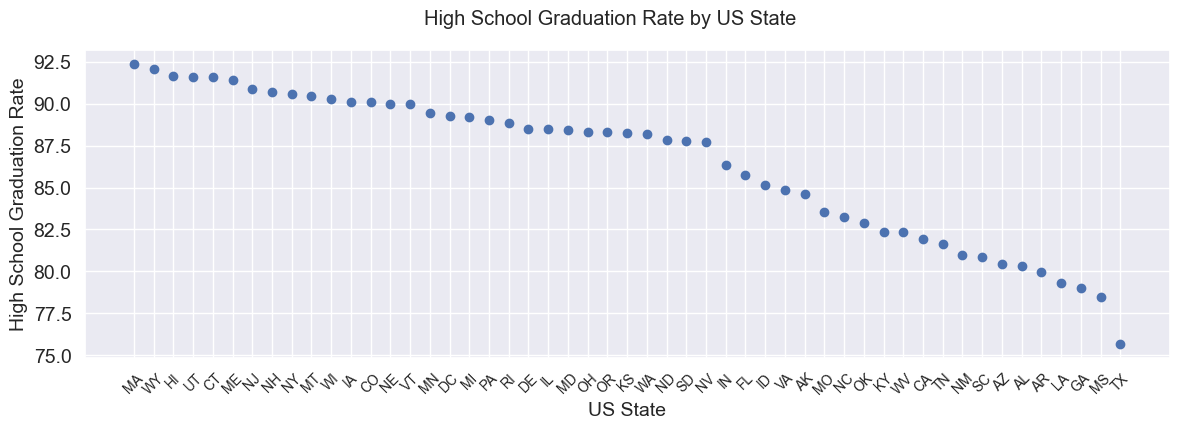

In [85]:
plt.figure(figsize=(14,4))
plt.suptitle('High School Graduation Rate by US State')
plt.ylabel('High School Graduation Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=14)
plt.scatter(graduation_rate.index, graduation_rate)
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [86]:
grad_vs_povr = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

In [87]:
povr_vs_grad = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()

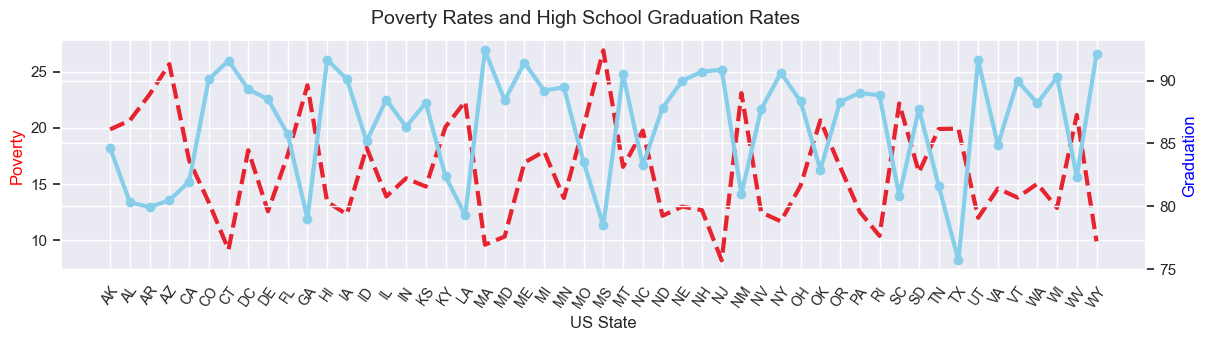

In [88]:
plt.figure(figsize=(14,3))
plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty', color='red')
ax2.set_ylabel('Graduation', color='blue')
 
ax1.plot(povr_vs_grad.index, povr_vs_grad, color='#E6232E', linewidth=3, linestyle='--')
ax2.plot(grad_vs_povr.index, grad_vs_povr, color='skyblue', linewidth=3, marker='o')

plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [89]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_poverty.sort_values('poverty_rate', ascending=False, inplace=True)

In [90]:
poverty = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})

In [91]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.sort_values('percent_completed_hs', ascending=False, inplace=True)
hs = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})

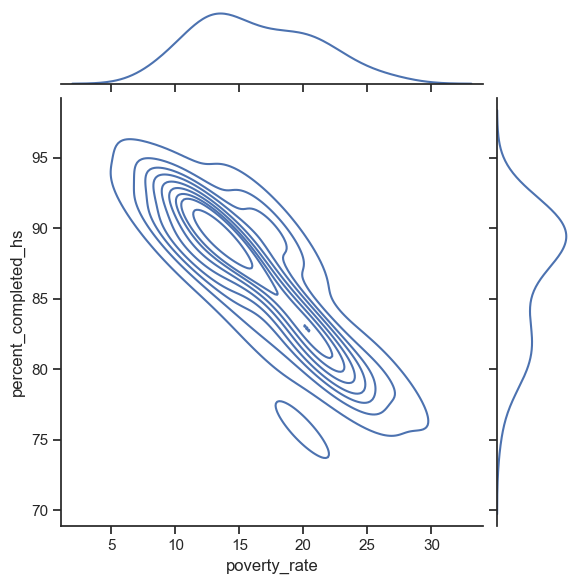

In [92]:
merged = pd.merge(hs, poverty, on=['Geographic Area'], how='inner')
sns.set_theme(style="ticks")
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged, kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

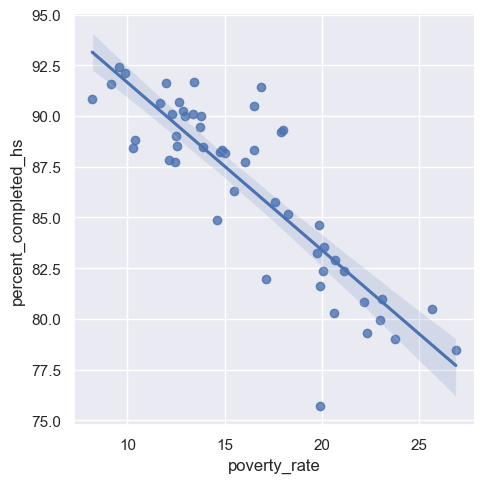

In [93]:
sns.set_theme(color_codes=True)
sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

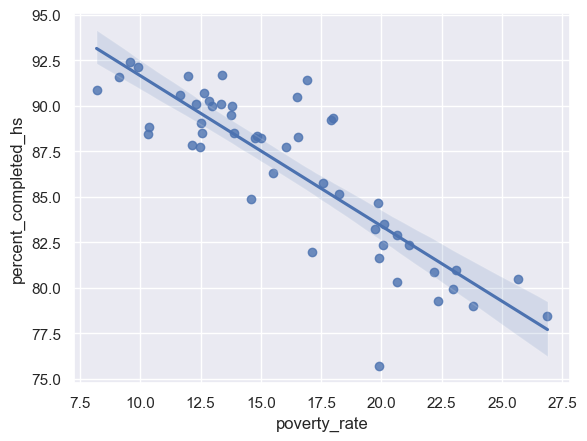

In [94]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [95]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [96]:
df_share_race_city.head()

Geographic area             City share_white share_black   
0              AL       Abanda CDP        67.2        30.2  \
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3

In [97]:
share_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[share_columns] = df_share_race_city[share_columns].apply(pd.to_numeric, errors='coerce')
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


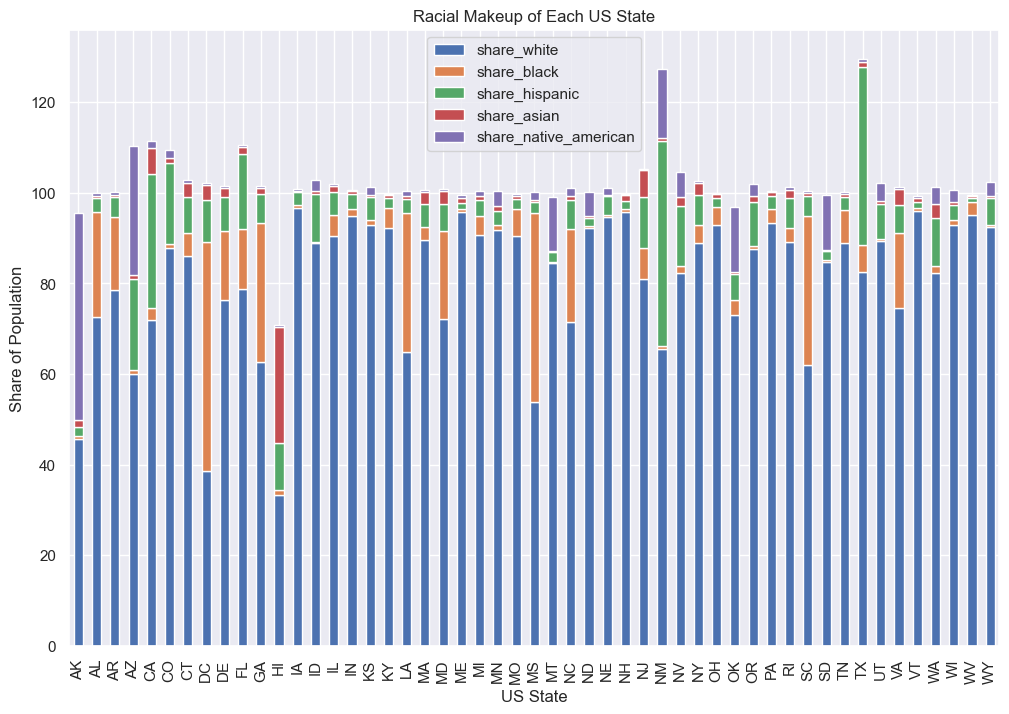

In [98]:
state_racial_shares = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']].mean()

state_racial_shares.plot.bar(stacked=True, figsize=(12, 8))

plt.xlabel('US State')
plt.ylabel('Share of Population')
plt.title('Racial Makeup of Each US State')

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [103]:
df_fatalities.race.nunique()

7

In [104]:
race_counts = df_fatalities['race'].value_counts()
print(race_counts)

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: count, dtype: int64


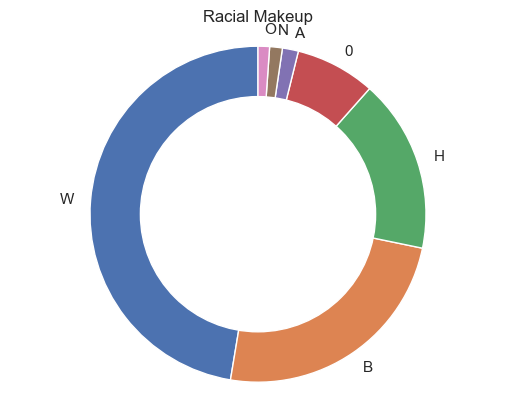

In [109]:
labels = race_counts.index
sizes = race_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, startangle=90)
ax.axis('equal')

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.title('Racial Makeup')

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [117]:
gender_death_counts = df_fatalities['gender'].value_counts()
print(gender_death_counts)

gender
M    2428
F     107
Name: count, dtype: int64


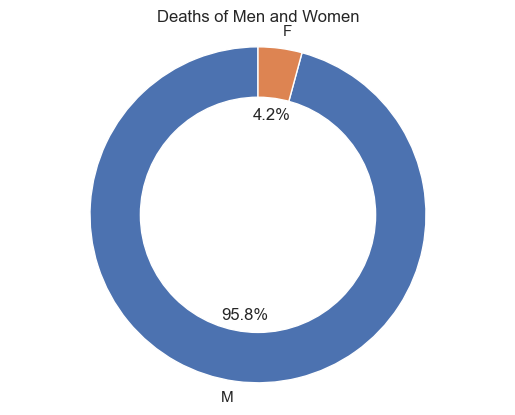

In [119]:
labels = gender_death_counts.index
sizes = gender_death_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.title('Deaths of Men and Women')

plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [128]:
gender_death_counts

gender
M    2428
F     107
Name: count, dtype: int64

In [131]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

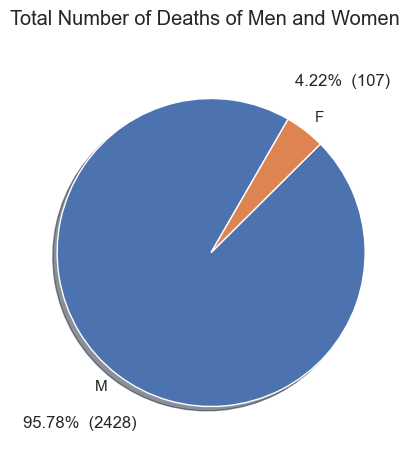

In [134]:
plt.figure(figsize=(5,5))
plt.suptitle('Total Number of Deaths of Men and Women')
plt.pie(gender_death_counts, labels=gender_death_counts.index, autopct=make_autopct(gender_death_counts), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)

plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [152]:
armed = df_fatalities.copy()

weapons = ['gun', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and knife',
       'baseball bat and bottle', 'fireworks', 'pen']

armed.armed = armed.armed.replace(weapons, 'armed')
percentage = armed.armed.value_counts()

armed.armed.unique()

array(['armed', 'unarmed', 0], dtype=object)

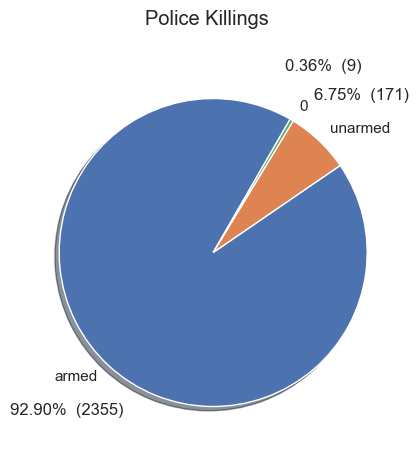

In [150]:
plt.figure(figsize=(5,5))
plt.suptitle('Police Killings')
plt.pie(percentage, labels=percentage.index, autopct=make_autopct(percentage), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
plt.show()


In [157]:
armed_death = df_fatalities.armed.value_counts()
armed_death

armed
gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat and fireplace poker       1
bean-bag gun                           1
chain                                  1
pen                                    1
Name: count, Length: 69, dtype: int64

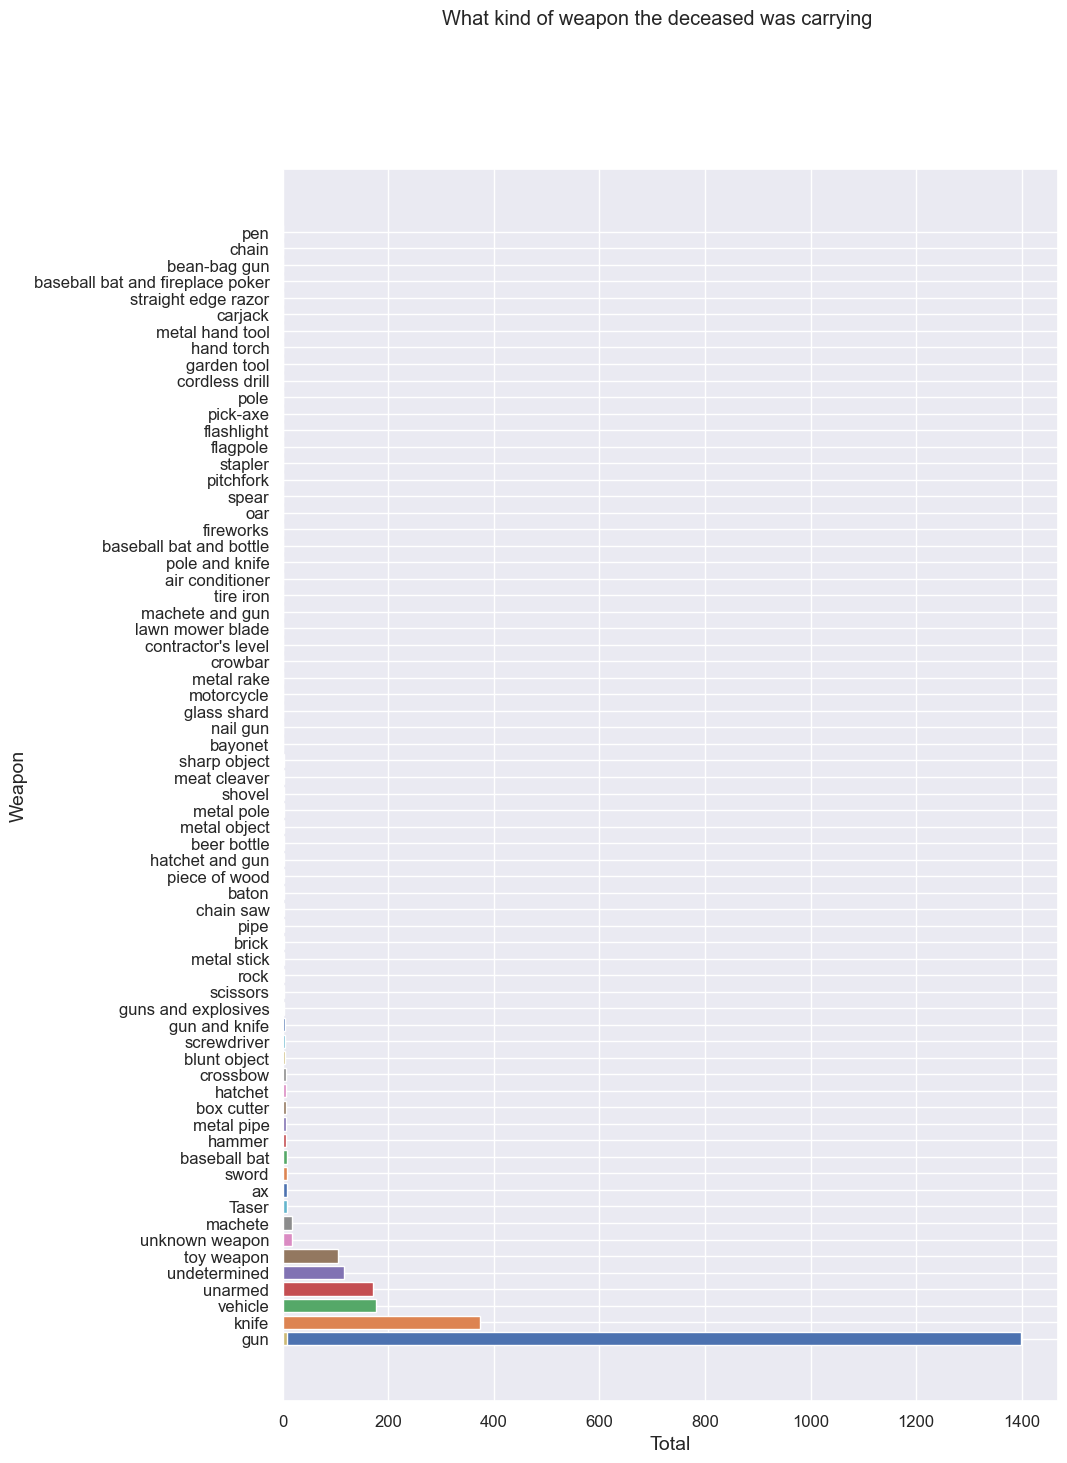

In [161]:
plt.figure(figsize=(10, 16))
plt.suptitle('What kind of weapon the deceased was carrying')
plt.ylabel('Weapon', fontsize=14)
plt.xlabel('Total', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for weapon, count in armed_death.items():
    plt.barh(weapon, count)

plt.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [179]:
total_deaths = df_fatalities.shape[0]
total_deaths

2535

In [166]:
under_25 = (df_fatalities['age'] < 25).sum()
under_25

527

In [192]:
percentage_death_under_25 = (under_25 / total_deaths) * 100
percentage_death_under_25 = round(percentage_death_under_25, 2)
print(f"The percentage of deaths under 25 is: {percentage_death_under_25}%")

The percentage of deaths under 25 is: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [193]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age   
0   3          Tim Elliot  02/01/15              shot         gun 53.00  \
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level   
0      M    A        Shelton    WA                     True       attack  \
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

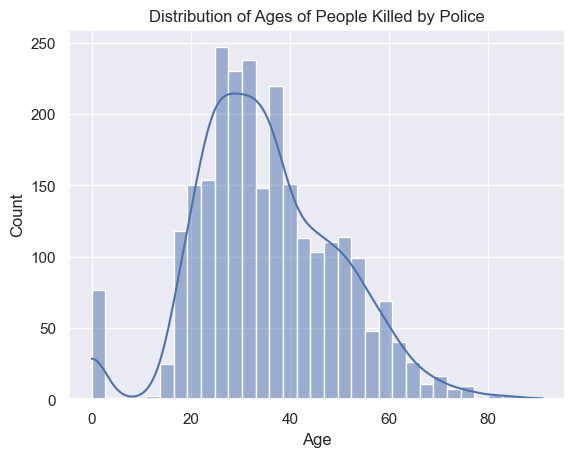

In [195]:
ages = df_fatalities['age']

sns.histplot(ages, kde=True)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages of People Killed by Police')

plt.show()

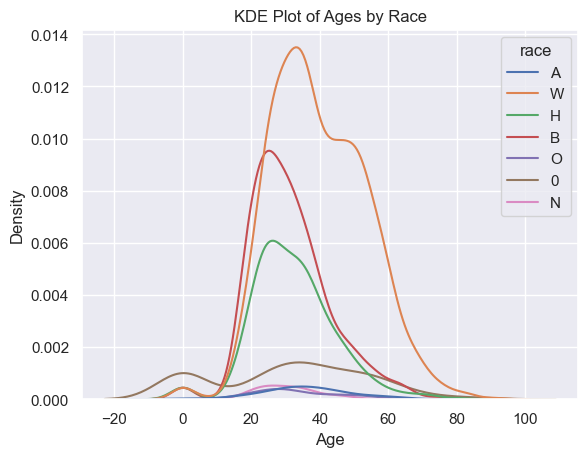

In [196]:
sns.kdeplot(data=df_fatalities, x='age', hue='race')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Ages by Race')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [197]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age   
0   3          Tim Elliot  02/01/15              shot         gun 53.00  \
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level   
0      M    A        Shelton    WA                     True       attack  \
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

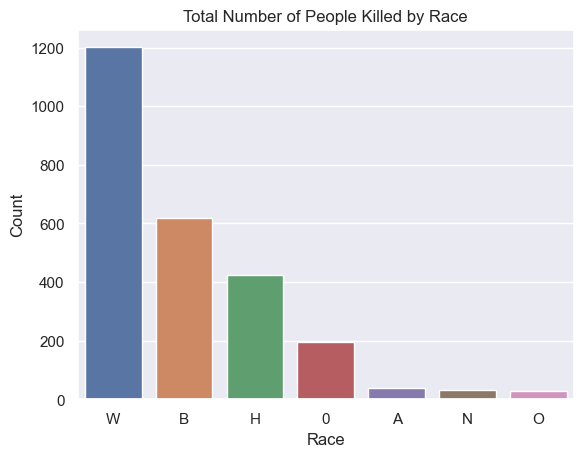

In [200]:
race_counts = df_fatalities['race'].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values)

plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Total Number of People Killed by Race')

plt.show()
# note the 0 is nan 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [205]:
mental_illness_killings = (df_fatalities['signs_of_mental_illness'] == True).sum()
mental_illness_killings

633

In [207]:
percentage_mental_illness = (mental_illness_killings / total_deaths) * 100

print(f"The percentage of people killed by police with a mental illness is: {percentage_mental_illness:.2f}%")

The percentage of people killed by police with a mental illness is: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

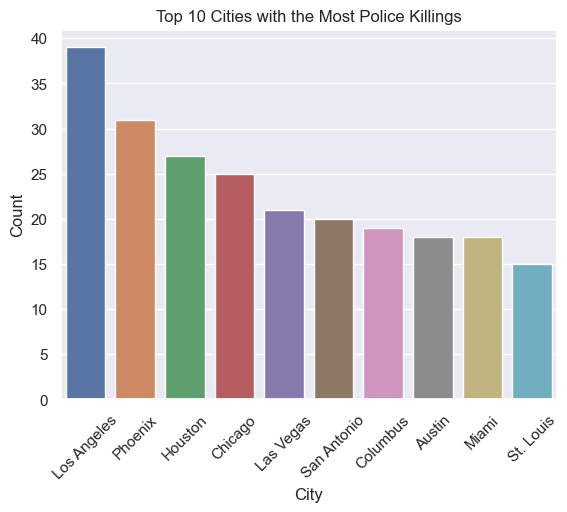

In [209]:
city_counts = df_fatalities['city'].value_counts()

top_10_cities = city_counts.head(10)

sns.barplot(x=top_10_cities.index, y=top_10_cities.values)

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Cities with the Most Police Killings')

plt.xticks(rotation=45)

plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [211]:
top_10_cities = df_fatalities['city'].value_counts().head(10).index
top_10_cities_data = df_fatalities[df_fatalities['city'].isin(top_10_cities)]
city_race_counts = top_10_cities_data.groupby(['city', 'race'])['id'].count()
city_race_shares = city_race_counts / city_race_counts.groupby('city').sum()
overall_race_shares = df_fatalities['race'].value_counts() / len(df_fatalities)

race_comparison = city_race_shares.unstack().fillna(0) - overall_race_shares

print(race_comparison)

race            0     A     B     H     N     O     W
city                                                 
Austin      -0.08 -0.02 -0.08 -0.06 -0.01 -0.01  0.25
Chicago     -0.04 -0.02  0.60 -0.13 -0.01 -0.01 -0.39
Columbus    -0.02 -0.02  0.34 -0.17 -0.01  0.04 -0.16
Houston     -0.04  0.02  0.31  0.06  0.02 -0.01 -0.36
Las Vegas    0.11 -0.02 -0.10  0.07 -0.01 -0.01 -0.05
Los Angeles  0.00  0.01  0.01  0.32 -0.01 -0.01 -0.32
Miami       -0.02 -0.02  0.20  0.17 -0.01 -0.01 -0.31
Phoenix      0.02 -0.02 -0.18  0.19  0.08 -0.01 -0.09
San Antonio  0.02 -0.02 -0.09  0.43 -0.01 -0.01 -0.32
St. Louis   -0.01 -0.02  0.49 -0.17 -0.01 -0.01 -0.27


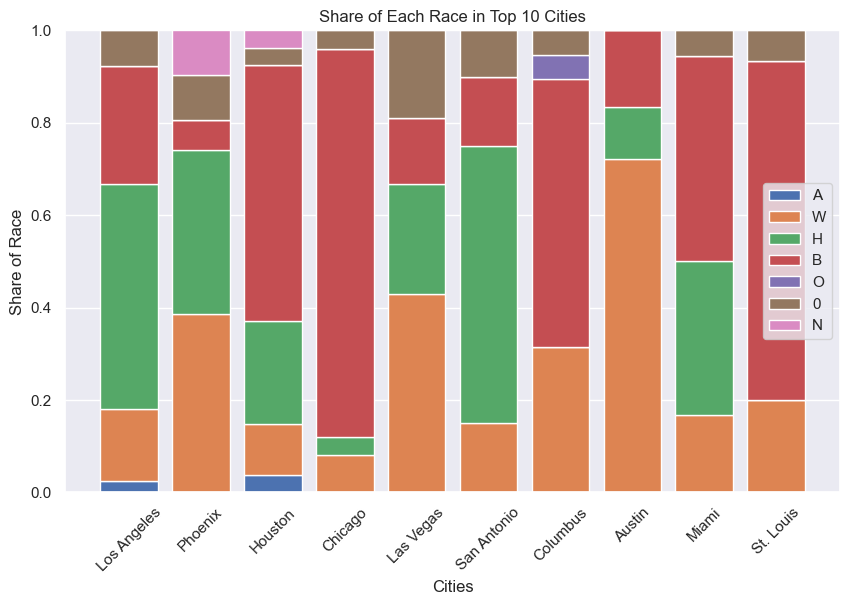

In [219]:
top_10_cities = df_fatalities['city'].value_counts().head(10).index
top_10_cities_data = df_fatalities[df_fatalities['city'].isin(top_10_cities)]
races = df_fatalities['race'].unique()
city_race_shares = np.zeros((len(top_10_cities), len(races)))

for i, city in enumerate(top_10_cities):
    city_data = top_10_cities_data[top_10_cities_data['city'] == city]
    city_race_counts = city_data['race'].value_counts()
    for j, race in enumerate(races):
        if race in city_race_counts:
            city_race_shares[i, j] = city_race_counts[race] / city_data.shape[0]

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(top_10_cities))

for j, race in enumerate(races):
    values = city_race_shares[:, j]
    ax.bar(top_10_cities, values, label=race, bottom=bottom)
    bottom += values

ax.set_xlabel('Cities')
ax.set_ylabel('Share of Race')
ax.set_title('Share of Each Race in Top 10 Cities')

ax.legend()
plt.xticks(rotation=45)
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [212]:
state_killings = df_fatalities['state'].value_counts()

# Create the choropleth map
fig = px.choropleth(locations=state_killings.index,
                    locationmode="USA-states",
                    color=state_killings.values,
                    scope="usa",
                    labels={'color': 'Number of Police Killings'},
                    title='Police Killings by US State')

# Show the map
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [214]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

killings_over_time = df_fatalities.groupby(df_fatalities['date'].dt.year)['id'].count()

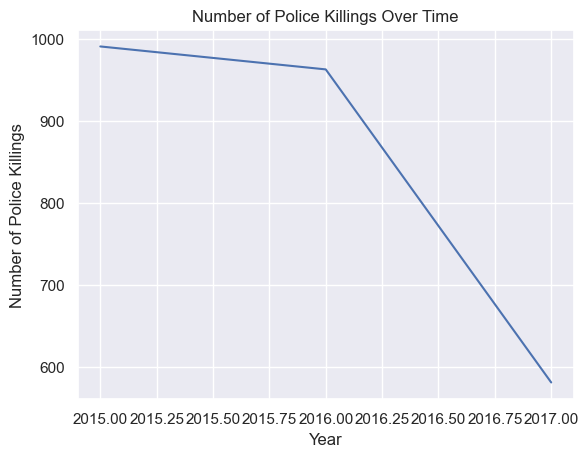

In [215]:
plt.plot(killings_over_time.index, killings_over_time.values)

plt.xlabel('Year')
plt.ylabel('Number of Police Killings')
plt.title('Number of Police Killings Over Time')

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).